<a href="https://colab.research.google.com/github/RenataTNT/ML_in_Production/blob/master/ML_in_biz_lesson1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1. Выберите наборы данных. которые можно интерпретировать, как временные ряды:

а) зависимость цены на недвижимость в еонкретном регионе от времени- ***можно интерпретировать как временной ряд, она меняется с течением времени***

б) скорость полета самолета при перелете из аэропорта А в аэропорт В, - **можно интерпретировать как временной ряд, она меняется с течением полета, при времени набора высоты, при времени снижения, при времени горизонтального полета**

в) количество отказов компьютера -- ***можно интерпретировать как временной ряд, количество отказов может меняется в течение дня / дня недели в соответствии с нагрузкой на сервер в период активной/неактивной работы пользователя ***


г) число обращений в поликлинику по району, - ***можно интерпретировать как временной ряд, количество обращений может, например, меняется в зависимости от сезона, например в осенне-зимний период ОРВИ количество обращений увеличивается  ***

д) координаты автобуса при движении по маршруту, -**можно интерпретировать как временной ряд, местоположение автобуса изменяется во времени**

е) координаты фигуры нарушителя в файле видеофиксации охранной системы. - ***можно интерпретировать как временной ряд, местоположение фигуры изменяется во времени, и записи в файле соодержат разные координаты в зависимости от момента записи  ***


2. вариант 2) Прочитайте COVID19 EDA для любой страны кроме Китая с длиной ряда больше 50 дней ( можно обновить данные по ссылке).

In [0]:
import pandas as pd
import matplotlib.pyplot as plt


In [0]:
covid_data=pd.read_csv('covid_19_data.csv')

In [0]:
covid_data.head()

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
0,1,01/22/2020,Anhui,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
1,2,01/22/2020,Beijing,Mainland China,1/22/2020 17:00,14.0,0.0,0.0
2,3,01/22/2020,Chongqing,Mainland China,1/22/2020 17:00,6.0,0.0,0.0
3,4,01/22/2020,Fujian,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
4,5,01/22/2020,Gansu,Mainland China,1/22/2020 17:00,0.0,0.0,0.0


In [0]:
covid_data.tail()

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
13524,13525,04/09/2020,Wyoming,US,2020-04-09 23:09:19,230.0,0.0,0.0
13525,13526,04/09/2020,Xinjiang,Mainland China,2020-04-09 23:09:19,76.0,3.0,73.0
13526,13527,04/09/2020,Yukon,Canada,2020-04-09 23:09:19,7.0,0.0,0.0
13527,13528,04/09/2020,Yunnan,Mainland China,2020-04-09 23:09:19,184.0,2.0,173.0
13528,13529,04/09/2020,Zhejiang,Mainland China,2020-04-09 23:09:19,1267.0,1.0,1235.0


In [0]:
covid_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13529 entries, 0 to 13528
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   SNo              13529 non-null  int64  
 1   ObservationDate  13529 non-null  object 
 2   Province/State   6967 non-null   object 
 3   Country/Region   13529 non-null  object 
 4   Last Update      13529 non-null  object 
 5   Confirmed        13529 non-null  float64
 6   Deaths           13529 non-null  float64
 7   Recovered        13529 non-null  float64
dtypes: float64(3), int64(1), object(4)
memory usage: 845.7+ KB


In [0]:
covid_data.loc[covid_data['Country/Region']=='Russia']

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
482,483,01/31/2020,NaN,Russia,1/31/2020 23:59,2.0,0.0,0.0
540,541,02/01/2020,NaN,Russia,1/31/2020 16:13,2.0,0.0,0.0
610,611,02/02/2020,NaN,Russia,2020-01-31T16:13:45,2.0,0.0,0.0
677,678,02/03/2020,NaN,Russia,2020-01-31T16:13:45,2.0,0.0,0.0
745,746,02/04/2020,NaN,Russia,2020-01-31T16:13:45,2.0,0.0,0.0
...,...,...,...,...,...,...,...,...
12064,12065,04/05/2020,NaN,Russia,2020-04-05 23:13:44,5389.0,45.0,355.0
12383,12384,04/06/2020,NaN,Russia,4/6/20 9:37,6343.0,47.0,406.0
12703,12704,04/07/2020,NaN,Russia,2020-04-07 23:11:31,7497.0,58.0,494.0
13023,13024,04/08/2020,NaN,Russia,2020-04-08 22:59:00,8672.0,63.0,580.0


Видно, что данные изо дня в день отражаются нарастающим итогом, поэтому определим количество заражений по странам на последний день наблюдений

In [0]:
covid_all_countries=covid_data.loc[covid_data['ObservationDate']=='04/09/2020'].groupby('Country/Region')['Confirmed'].sum()
covid_all_countries.sort_values(ascending=False).head(30)

Country/Region
US                461437.0
Spain             153222.0
Italy             143626.0
France            118781.0
Germany           118181.0
Mainland China     81865.0
Iran               66220.0
UK                 65872.0
Turkey             42282.0
Belgium            24983.0
Switzerland        24051.0
Netherlands        21903.0
Canada             20654.0
Brazil             18092.0
Portugal           13956.0
Austria            13244.0
South Korea        10423.0
Russia             10131.0
Israel              9968.0
Sweden              9141.0
India               6725.0
Ireland             6574.0
Norway              6211.0
Australia           6108.0
Chile               5972.0
Denmark             5830.0
Poland              5575.0
Czech Republic      5569.0
Peru                5256.0
Romania             5202.0
Name: Confirmed, dtype: float64

Подсчитаем количество дней наблюдений по странам

In [0]:
Covid_oldest_cases=covid_data[['Country/Region','ObservationDate']].drop_duplicates().groupby('Country/Region').count()
Covid_oldest_cases.sort_values(by='ObservationDate', ascending=False).head(30)

,ObservationDate
Country/Region,
South Korea,79
Japan,79
Mainland China,79
Taiwan,79
Macau,79
Thailand,79
Hong Kong,79
US,79
Singapore,78


**Russia** попадает под условие задания "с длиной ряда больше 50 дней ". Будем исследовать ее

Приведем дату к формату datetime, Выберем Россию

In [0]:
COVID = covid_data.copy()

COVID['Date']= pd.to_datetime(COVID['ObservationDate']).dt.date
COVID.head()

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered,Date
0,1,01/22/2020,Anhui,Mainland China,1/22/2020 17:00,1.0,0.0,0.0,2020-01-22
1,2,01/22/2020,Beijing,Mainland China,1/22/2020 17:00,14.0,0.0,0.0,2020-01-22
2,3,01/22/2020,Chongqing,Mainland China,1/22/2020 17:00,6.0,0.0,0.0,2020-01-22
3,4,01/22/2020,Fujian,Mainland China,1/22/2020 17:00,1.0,0.0,0.0,2020-01-22
4,5,01/22/2020,Gansu,Mainland China,1/22/2020 17:00,0.0,0.0,0.0,2020-01-22


In [0]:
Russia=COVID.loc[COVID['Country/Region']=='Russia']
Russia_covid=Russia.set_index(pd.DatetimeIndex(Russia['Date'].values))
Russia_covid.head()

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered,Date
2020-01-31,483,01/31/2020,NaN,Russia,1/31/2020 23:59,2.0,0.0,0.0,2020-01-31
2020-02-01,541,02/01/2020,NaN,Russia,1/31/2020 16:13,2.0,0.0,0.0,2020-02-01
2020-02-02,611,02/02/2020,NaN,Russia,2020-01-31T16:13:45,2.0,0.0,0.0,2020-02-02
2020-02-03,678,02/03/2020,NaN,Russia,2020-01-31T16:13:45,2.0,0.0,0.0,2020-02-03
2020-02-04,746,02/04/2020,NaN,Russia,2020-01-31T16:13:45,2.0,0.0,0.0,2020-02-04


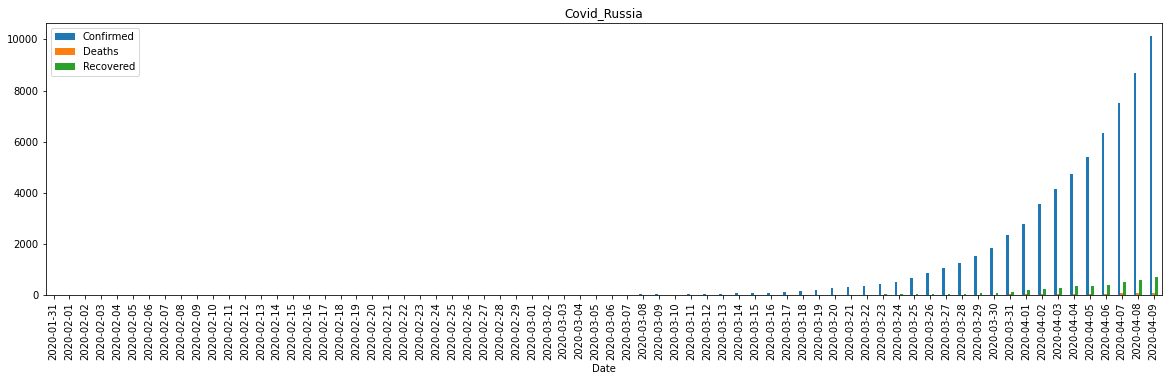

In [0]:
Russia_covid.plot('Date', ['Confirmed', 'Deaths', 'Recovered'], figsize=(20,5), title='Covid_Russia', kind='bar')


3. вариант 2) Сделайте ресемплинг COVID19 на интервалы 3 дня, неделя, 2 недели.Постройте график изменения среднего по выборке и среднего отклонения по выборке на группах для интервалах 3 дня, неделя, 2 недели (одна группа на интервале - одно значение std или mean, т.е. если было 28 деней, то 9 значений для ресемплинга на 3 дня, 4 значения при ресемплинге неделя и 2 значения при ресемплинге 2 недели )

3 дня

In [0]:
Russia_covid.resample('3D').max().head()

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered,Date
2020-01-31,611,02/02/2020,NaN,Russia,2020-01-31T16:13:45,2.0,0.0,0.0,2020-02-02
2020-02-03,817,02/05/2020,NaN,Russia,2020-01-31T16:13:45,2.0,0.0,0.0,2020-02-05
2020-02-06,1033,02/08/2020,NaN,Russia,2020-01-31T16:13:45,2.0,0.0,0.0,2020-02-08
2020-02-09,1249,02/11/2020,NaN,Russia,2020-01-31T16:13:45,2.0,0.0,0.0,2020-02-11
2020-02-12,1469,02/14/2020,NaN,Russia,2020-02-12T14:43:03,2.0,0.0,2.0,2020-02-14


In [0]:
Mean3D=Russia_covid.resample('3D').mean()
Mean3D=Mean3D.drop('SNo', axis=1)

In [0]:
std3D=Russia_covid.resample('3D').std()
std3D=std3D.drop('SNo', axis=1)

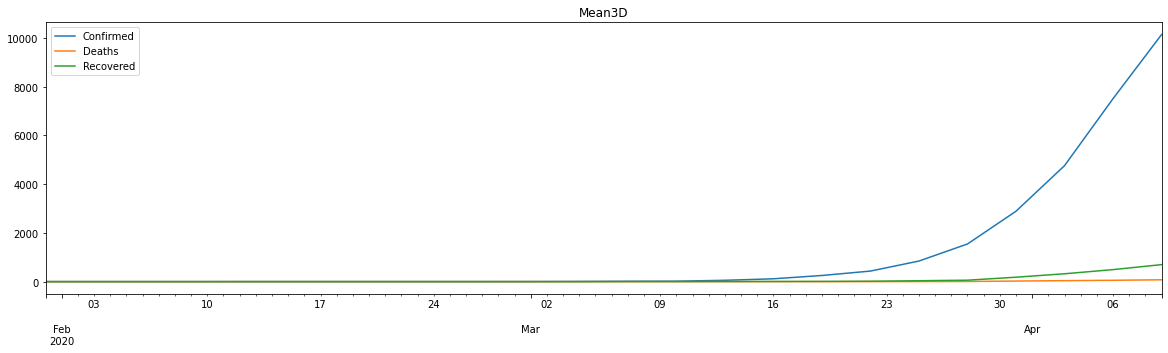

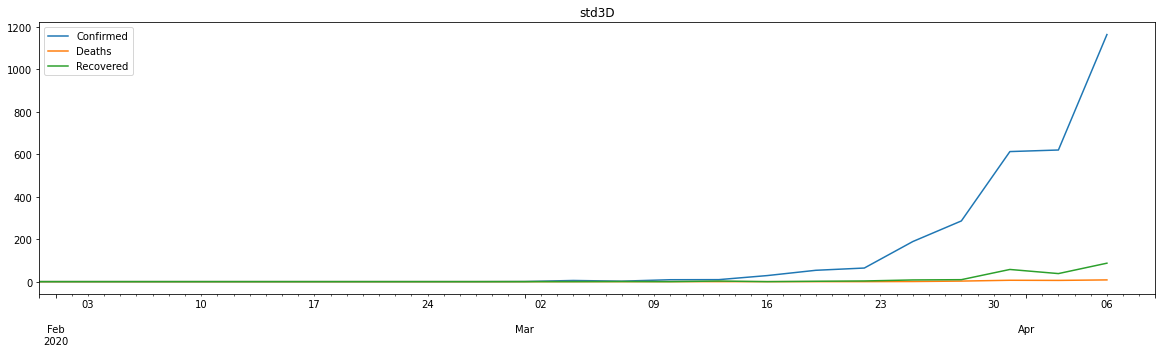

In [0]:
Mean3D.plot(figsize=(20,5), title='Mean3D')
std3D.plot(figsize=(20,5), title='std3D')


1 неделя

In [0]:
Russia_covid.resample('W').max().head()

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered,Date
2020-02-02,611,02/02/2020,NaN,Russia,2020-01-31T16:13:45,2.0,0.0,0.0,2020-02-02
2020-02-09,1105,02/09/2020,NaN,Russia,2020-01-31T16:13:45,2.0,0.0,0.0,2020-02-09
2020-02-16,1619,02/16/2020,NaN,Russia,2020-02-12T14:43:03,2.0,0.0,2.0,2020-02-16
2020-02-23,2168,02/23/2020,NaN,Russia,2020-02-12T14:43:03,2.0,0.0,2.0,2020-02-23
2020-03-01,2906,03/01/2020,NaN,Russia,2020-02-12T14:43:03,2.0,0.0,2.0,2020-03-01


In [0]:
Mean1W=Russia_covid.resample('W').mean()
Mean1W=Mean1W.drop('SNo', axis=1)

In [0]:
std1W=Russia_covid.resample('W').std()
std1W=std1W.drop('SNo', axis=1)

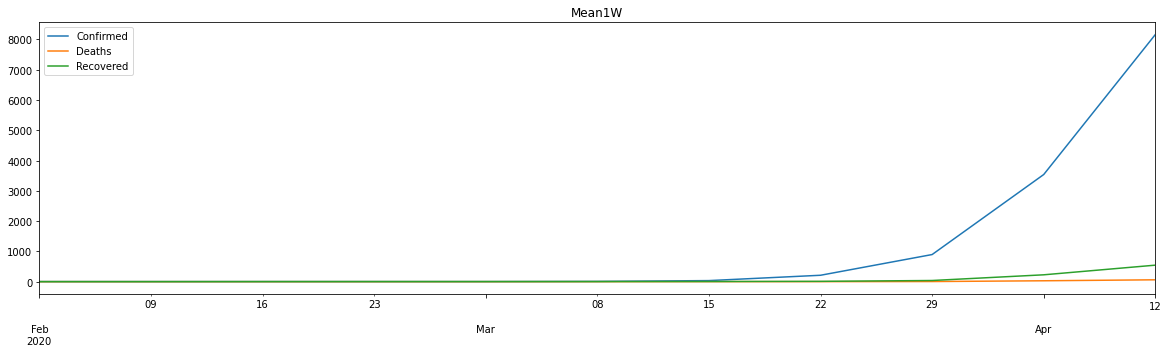

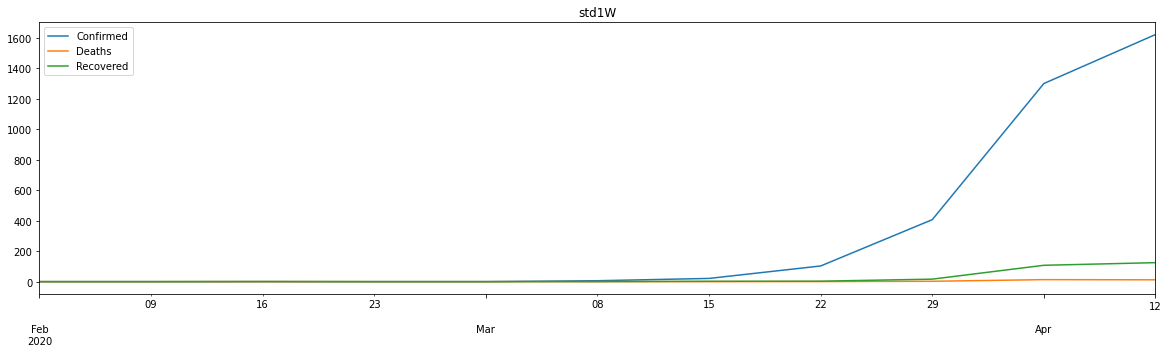

In [0]:
Mean1W.plot(figsize=(20,5), title='Mean1W')
std1W.plot(figsize=(20,5), title='std1W')

2 недели

In [0]:
Russia_covid.resample('2W').max().head()

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered,Date
2020-02-02,611,02/02/2020,NaN,Russia,2020-01-31T16:13:45,2.0,0.0,0.0,2020-02-02
2020-02-16,1619,02/16/2020,NaN,Russia,2020-02-12T14:43:03,2.0,0.0,2.0,2020-02-16
2020-03-01,2906,03/01/2020,NaN,Russia,2020-02-12T14:43:03,2.0,0.0,2.0,2020-03-01
2020-03-15,5719,03/15/2020,NaN,Russia,2020-03-15T18:20:18,63.0,0.0,8.0,2020-03-15
2020-03-29,9867,03/29/2020,NaN,Russia,3/8/20 5:31,1534.0,8.0,64.0,2020-03-29


In [0]:
Mean2W=Russia_covid.resample('2W').mean()
Mean2W=Mean2W.drop('SNo', axis=1)

In [0]:
std2W=Russia_covid.resample('2W').std()
std2W=std2W.drop('SNo', axis=1)

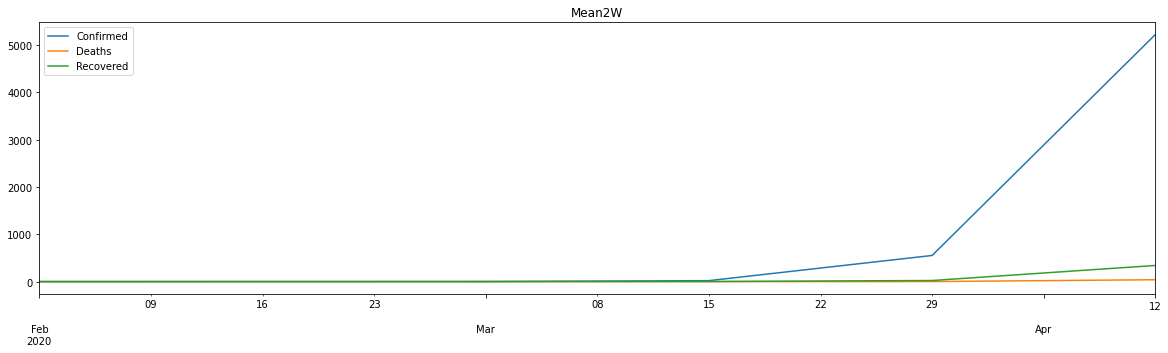

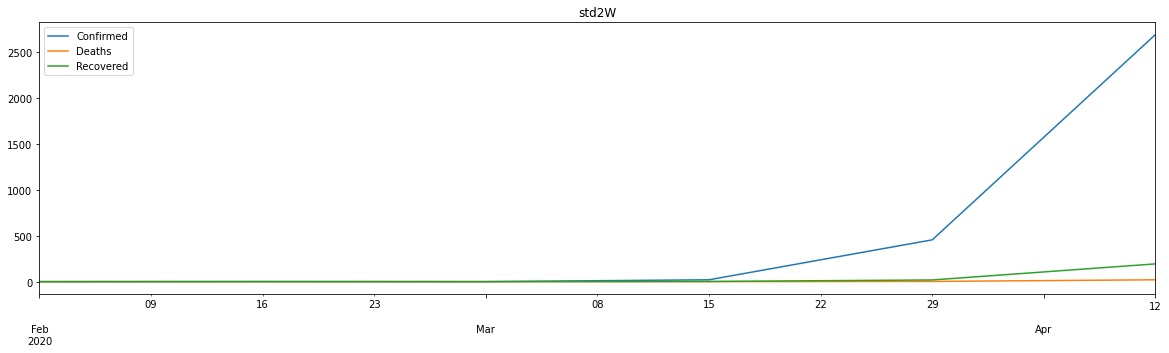

In [0]:
Mean2W.plot(figsize=(20,5), title='Mean2W')
std2W.plot(figsize=(20,5), title='std2W')

Поведение статистических характеристик более сглаженное при дневных диапазонах, и более ступенчятое при снижении количества диапазонов